In [490]:
import pandas as pd

import numpy as nm
import os

import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression

In [491]:
df = pd.read_csv("Covid.csv")

In [492]:
df.shape

(18942, 15)

In [493]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [494]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [495]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,1.894200e+04,7411.000000,7411.000000,18942.000000,13822.000000,18942.000000,7816.000000,7816.000000,18942.000000,13731.000000
mean,6.437455e+04,74820.018486,4194.363244,729.714339,50.167342,1968.092018,2849.385491,284.978378,14.387340,1.239822
std,1.304390e+05,91823.421280,6863.426627,1573.646689,392.395964,3965.241112,3992.182172,832.180400,57.381423,80.018263
min,0.000000e+00,0.000000,0.000000,-33355.000000,-33864.000000,0.000000,0.000000,0.000000,-1824.000000,-5482.000000
25%,6.900000e+01,6949.500000,0.000000,0.000000,0.000000,2.000000,283.000000,0.000000,0.000000,0.000000
50%,1.112100e+04,38807.000000,1132.000000,156.000000,0.000000,286.500000,1327.000000,38.000000,2.000000,0.000000
75%,7.376450e+04,114043.500000,5179.500000,773.000000,19.000000,1916.500000,3592.000000,208.000000,13.000000,0.000000
max,1.245948e+06,748603.000000,53159.000000,20759.000000,7191.000000,24305.000000,19613.000000,5482.000000,4585.000000,5482.000000


### Cleaning Data and Data Preparation

In [496]:
drop_columns = ['conf_cases','prob_cases','pnew_case','conf_death','prob_death','pnew_death','created_at','consent_cases','consent_deaths']

clean_df=df.copy() 
clean_df.drop(drop_columns, inplace=True, axis=1)  #Dropping unnecessary columns

In [497]:
clean_df.head()

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,01/22/2020,CO,0,0,0,0
1,01/23/2020,CO,0,0,0,0
2,01/24/2020,CO,0,0,0,0
3,01/25/2020,CO,0,0,0,0
4,01/26/2020,CO,0,0,0,0


In [498]:
clean_df.shape

(18942, 6)

In [499]:
df_RI=clean_df.loc[clean_df['state']=='RI']  #Filtering data to only show rows relating to Rhode Island

In [500]:
df_RI['submission_date']=pd.to_datetime(df_RI['submission_date']) #Converts submission_date column to compatible date

In [501]:
start_date=pd.to_datetime('03-01-2020')  #The new starting date of the data set is March 1

df_RI_post0301=df_RI[df_RI['submission_date']>=start_date]

### Spitting data into Training and Testing Sets

In [502]:
df_RI_post0301_X= df_RI_post0301['new_case']  #New cases is featured variable
df_RI_post0301_y= df_RI_post0301['new_death']  #New deaths is the predicted variable

In [503]:
X_train, X_test, y_train, y_test = train_test_split(df_RI_post0301_X,df_RI_post0301_y, test_size=0.2, random_state=0) 
#Splitting data into training and test sets   #Training data is 80% while testing data is 20%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((221,), (56,), (221,), (56,))

### Linear Regression

In [504]:
reg = LinearRegression().fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
#Assigning linear regression of training set to variable reg

In [505]:
reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)) # Function calculates r^2, coefficient of determination
'''Coefficient of determination measures strength of the correlation and it is lower 
in this instance because data is not standardaized and outliers are not disregarded'''

0.09780441183218103

In [506]:
reg.coef_, reg.intercept_   # new_deaths_est = 0.0071*new_cases+3.43  #Form of y = mx + b

(array([[0.00711469]]), array([3.4322503]))

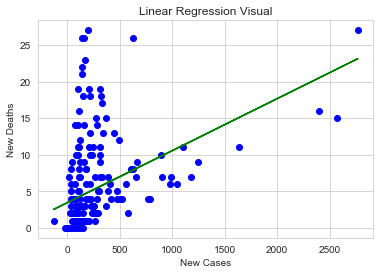

In [507]:
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), color = "blue")
plt.plot(X_train.values.reshape(-1,1), reg.predict(X_train.values.reshape(-1,1)), color = "green")
plt.title("Linear Regression Visual")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.show()    #Plot of training set

In [508]:
#Example of linear regression
'''
Given that there are 750 new cases, the number 
of predicted new deaths is expected to be approximately 9 for a given day
'''

round(reg.predict([[750]])[0][0],0)

9.0

In [509]:
results_lr=pd.DataFrame(X_test.values, columns=['New case'])    #Table represents algorithm's prediction compared to the actual new deaths
results_lr['Actual new_deaths']=y_test.values
results_lr['Predicted new deaths']=reg.predict(X_test.values.reshape(-1,1))
results_lr

,New case,Actual new_deaths,Predicted new deaths
0,343,3,5.872589
1,0,0,3.432250
2,0,0,3.432250
3,2,0,3.446480
4,430,13,6.491567
5,120,3,4.286013
6,1629,9,15.022079
7,215,18,4.961908
8,134,4,4.385619
9,851,16,9.486851


### Representations of Data

(array([173.,  73.,  13.,   7.,   5.,   1.,   2.,   0.,   1.,   2.]),
 array([-130. ,  159.9,  449.8,  739.7, 1029.6, 1319.5, 1609.4, 1899.3,
        2189.2, 2479.1, 2769. ]),
 <a list of 10 Patch objects>)

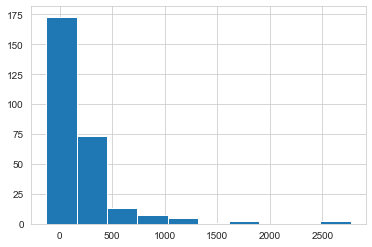

In [510]:
#Total New Cases Histogram shows how many times there were a certain range of cases in a day
plt.hist(df_RI_post0301['new_case'])

(array([136.,  51.,  28.,  15.,  15.,  11.,   7.,   5.,   3.,   6.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

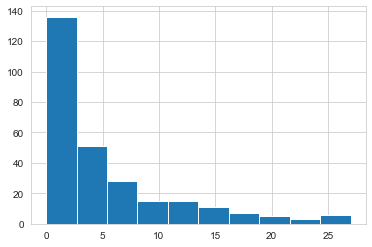

In [511]:
#Total New Deaths Histogram shows how many times there were certain range of cases in a day
plt.hist(df_RI_post0301['new_death'])

Text(0.5, 1.0, 'Total New Cases in RI per Month')

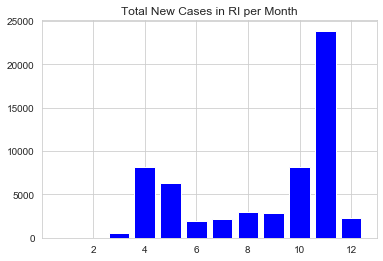

In [512]:
#Bar Graph that shows total cases per month
df_RI_post0301['month']=df_RI_post0301['submission_date'].apply(lambda x: x.month) # form a month column using the date column
new_cases_by_month=[]
for m in range(1,13): # sums over new cases for each month and adds to list 
    new_cases_sum=df_RI_post0301[df_RI_post0301['month']==m]['new_case'].sum()
    new_cases_by_month.append(new_cases_sum)
    
months=[1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(months,new_cases_by_month,color = "blue")
plt.title("Total New Cases in RI per Month")

Text(0.5, 1.0, 'Total New Deaths in RI per Month')

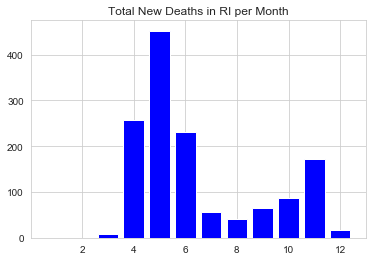

In [513]:
#Bar Graph that shows total new deaths per month

new_deaths_by_month=[]
for m in range(1,13):
    new_deaths_sum=df_RI_post0301[df_RI_post0301['month']==m]['new_death'].sum()
    new_deaths_by_month.append(new_deaths_sum)
    
months=[1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(months,new_deaths_by_month,color = "blue")
plt.title("Total New Deaths in RI per Month")

### Logistic Regression

In [514]:
logreg = LogisticRegression()

In [515]:
df_RI=df.loc[clean_df['state']=='RI']    #create new RI dataframe 
df_MT=df.loc[clean_df['state']=='MT']    #create new Montana dataframe
df_RI['submission_date']=pd.to_datetime(df_RI['submission_date']) #Converts submission_date column to compatible date
df_MT['submission_date']=pd.to_datetime(df_MT['submission_date'])
start_date=pd.to_datetime('03-01-2020')  #The new starting date of the data set is March 1
df_RI=df_RI[df_RI['submission_date']>=start_date]  #Data for RI starts March 1
df_MT=df_MT[df_MT['submission_date']>=start_date]  #Data for MT starts March 1

df_RI.drop(drop_columns, inplace=True, axis=1)
df_MT.drop(drop_columns, inplace=True, axis=1)

df_RI_MT=df_RI.merge(df_MT, left_on='submission_date', right_on='submission_date')  
#Combines RI and MT data frames based on the date column in table

In [516]:
df_RI_MT['RI Greater']=df_RI_MT['new_death_x']>=df_RI_MT['new_death_y'] #Variable for RI having greater number of deaths than MT

In [517]:
df_RI_MT_X=df_RI_MT[['new_case_x', 'new_case_y']]
df_RI_MT_y=df_RI_MT[['RI Greater']]

In [518]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_RI_MT_X,df_RI_MT_y, test_size=0.2, random_state=0) 
#Splitting data into training and test sets
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((221, 2), (56, 2), (221, 1), (56, 1))

In [519]:
logreg.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [520]:
results=X_test2.copy()
results['Actual RI Greater Deaths']=y_test2
results['Predicted RI Greater Deaths']=logreg.predict(X_test2.values)
results

,new_case_x,new_case_y,Actual RI Greater Deaths,Predicted RI Greater Deaths
218,343,663,False,False
225,0,423,False,False
190,0,115,False,True
15,2,0,True,True
55,430,1,True,True
198,120,137,True,True
253,1629,374,True,True
81,215,1,True,True
207,134,328,True,True
268,851,1123,True,False


In [521]:
# This model uses 2 features: RI new_cases + MT new_cases
# For a given day, given the # new cases in RI and the # new cases in MT,
    # The model predicts if RI has >= # new_deaths of MT
        # True = predicts RI to have >= MT
        # False = predicts RI < MT